<a href="https://colab.research.google.com/github/danielfrgs/2022_1-Reconocimiento-Patrones/blob/main/Tareas/Tarea%209/Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 7: Implementación de un Autómata

Daniel Fragoso Alvarado

Jesús Enrique Gómez Martínez

Hugo Rangel Rámirez 

In [ ]:
class Automata:
    '''
    ----------
    Clase que ejecuta un Autómata de PILA FINITO DETERMINISTA, con la posibilidad de validación por pila vacía.
    ----------
    Parámetros:
        Q : Lista de Estados
        Sigma : Alfabeto de entrada
        Gamma : Alfabeto de la Pila
        delta :  Diccionario de Estados
        q0 : Estado(S) Inicil(ES)
        z0 : Simbolo Inicial de la Pila
        F : Lista Estados Finales
        vacias : Booleano que indica si acepta por Pila vácia.
    
    Convencioes de Simbolos de la operacion de pila:
        epsilon : Simbolo para la extracción
        X : Simbolo para la lectura sin hacer ninguna acción 
        Y/Z : Operación X se remplaza por Z y Y se introduce en la Pila
        
    Convención de la fución delta:
        (estado, lo que lee, top pila) : (estado al que llega, operacion)

    Notas:
        1. Gamma no puede contener a 'epsilon' como simbolo.
    '''
    # Definimos los elementos del automata
    def __init__(self, Q, Sigma, Gamma, delta, q0, z0, F, vacias = True):
        self.Q = Q
        self.Sigma = Sigma
        self.Gamma = Gamma
        self.delta = delta
        self.q0 = q0
        self.z0 = z0
        self.F = F
        self.vacias = vacias

    # Función que extrae 
    def epsilon(self, pila):
        pila.pop()
    
    # Función que remplaza X y lo sustituye por Y, luego ingresa Z.     
    def YZ(self, yz, pila):
        # Separamos la cadena entre valor y operación
        Y, Z = yz.split('/')
        # Aplicamos la fución epsilon y agregamos Z.
        if Y == 'epsilon':
            self.epsilon(pila)
            pila.append(Z)
        # Remplazamos y agregamos
        else:
            pila.pop()
            pila.append(Z)
            pila.append(Y)


    def decide(self, cadena):
        '''
        Función que determina si  una cadena pertenece al lenguaje.

        Parámetros:
            cadena: String que deseamos identificar como parte de uestro lenguaje.
        '''
        # Verificación de que la cadena pertenezca a nuestro lenguaje.
        assert all(x in self.Sigma for x in list(cadena)), 'La cadena tiene caracteres que no pertenecen al vocabulario'

        # Iniciamos la pila con el estado inicial de la pila z0
        pila = [self.z0]
        # Iniciamos la lectura de estados iniciando en el inicial q0
        actual=self.q0
        # Cambiamos el orden de la caden apara poder hacer uso de las funciones sobre lista.
        cadena=list(cadena)[::-1]

        # Iniciamos un ciclo que se itere hasta el final de la cadena
        while True:
            # Intentamos extraer el primer elemento 
            try:
                elemento = cadena.pop()
            # Si llegamos al final de la cadena concluimos el ciclo while.
            except:
                break
            
            # Intentamos extraer el final de la pila
            try:
                final_pila = pila[-1]
            # Si no se puede extraer pero no hemos llegado al final de la pila, significa que no pertenece al lenguaje.
            except:
                return False
            # Generemos el paso de estados
            try:
                tupla=self.delta[(actual, elemento, final_pila)]
                actual, operacion = tupla[0], tupla[1]
                if operacion =='epsilon':
                    self.epsilon(pila)
                elif operacion =='X':
                    continue
                else:
                    self.YZ(operacion, pila)
            # Si no es posible generar el paso de estados, no pertenece al lenguaje (Suponiendo el automata es correcto)
            except:
                return False

        # Vamos a especificar la cadena por validación por pila vácia.
        if self.vacias:
            if pila == []:
                return True
            else:
                return False
        # Vamos a especificar la cadena por validación de estados finales.
        else:
            if actual in self.F:
                return True
            else:
                return False

EJEMPLO: 

Automata para el lenguaje $$L=\{0^{n}1^{n}:n\geq 1\}$$ con alfabeto $$\Sigma=\{0,1\}$$

A continuación se muestra el diagrama del automata que se utilizará.

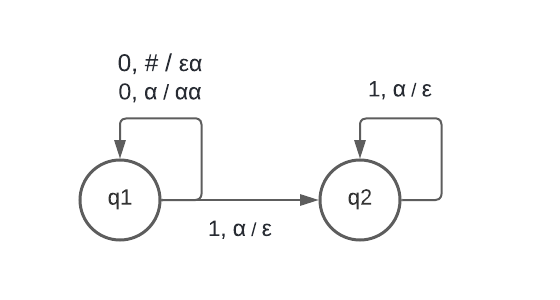

In [ ]:
Q_1 = ['q1', 'q2']
Sigma_1 = ['0','1']
Gamma_1 = ['#', 'alpha'] 
delta_1 = {('q1', '0', '#'):('q1', 'epsilon/alpha'), ('q1', '0', 'alpha'):('q1', 'alpha/alpha'),
            ('q1', '1', 'alpha'):('q2','epsilon'), ('q2', '1', 'alpha'):('q2', 'epsilon')}
q0_1 = 'q1'
z0_1 = '#'
F = [] 

In [ ]:
my_automata = Automata(Q_1, Sigma_1, Gamma_1, delta_1, q0_1, z0_1, F)

In [ ]:
#Metamos algo que no pertenece al alfabeto de simbolos
my_automata.decide('002')

AssertionError: ignored

In [ ]:
#Una cadena larga que si tiene n cantidad de ceros seguida de n cantidad de 1
my_automata.decide('000000000000111111111111')

True

In [ ]:
#Caso base con n=1.
my_automata.decide('01')

True

In [ ]:
#Una cadena de un solo número
my_automata.decide('0')

False

In [ ]:
#Una cadena que empiece con 1 y no con 0
my_automata.decide('101')

False

In [ ]:
#Una cadena con 2 ceros seguidos de 3 unos
my_automata.decide('00111')

False

In [ ]:
#Una cadena con 3 ceros seguidos de 2 unos
my_automata.decide('00011')

False

In [ ]:
#Con una cadena vacía
my_automata.decide('')

False